In [77]:
#Create simple Gaussian profile with added noise
# Store in format required for GaussPy

import numpy as np
import pickle

# create a function which returns the values of the Gaussian function for a
# given x
def gaussian(amp, fwhm, mean):
    return lambda x: amp * np.exp(-4. * np.log(2) * (x-mean)**2 / fwhm**2)

# Data properties
RMS = 0.05
NCHANNELS = 512
FILENAME = 'simple_gaussian.p'

# Component properties
AMP = 1.0
FWHM = 20
MEAN = 256

# Initialize
data = {}
chan = np.arange(NCHANNELS)
errors = np.ones(NCHANNELS) * RMS

spectrum = np.random.randn(NCHANNELS) * RMS
spectrum += gaussian(AMP, FWHM, MEAN)(chan)

# Enter results into AGD dataset
data['data_list'] = data.get('data_list', []) + [spectrum]
data['x_values'] = data.get('x_values', []) + [chan]
data['errors'] = data.get('errors', []) + [errors]

pickle.dump(data, open(FILENAME, 'wb'))
# with open('filename.pickle', 'wb') as handle:
#     pickle.dump(data, handle)

# pickle.dump(data, open(FILENAME, 'w'))

In [78]:
# Decompose simple dataset using AGD
import pickle
import gausspy.gp as gp
import importlib
importlib.reload(gp)
# Specify necessary parameters
alpha1 = 1.
snr_thresh = 5.
FILENAME_DATA = 'simple_gaussian.p'
FILENAME_DATA_DECOMP = 'simple_gaussian_decomposed.p'

# Load GaussPy
g = gp.GaussianDecomposer()

# Setting AGD parameters
g.set('phase', 'one')
g.set('SNR_thresh', [snr_thresh, snr_thresh])
g.set('alpha1', alpha1)

# Run GaussPy
data_decomp = g.batch_decomposition(FILENAME_DATA)

# Save decomposition information
print(FILENAME_DATA_DECOMP)
pickle.dump(data_decomp, open(FILENAME_DATA_DECOMP, 'wb'))

using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]

SUCCESS
100 finished.%
simple_gaussian_decomposed.p


In [79]:
data_decomp.keys()

dict_keys(['index_fit', 'amplitudes_fit', 'fwhms_fit', 'means_fit', 'index_initial', 'amplitudes_initial', 'fwhms_initial', 'means_initial', 'amplitudes_fit_err', 'fwhms_fit_err', 'means_fit_err', 'best_fit_rchi2'])

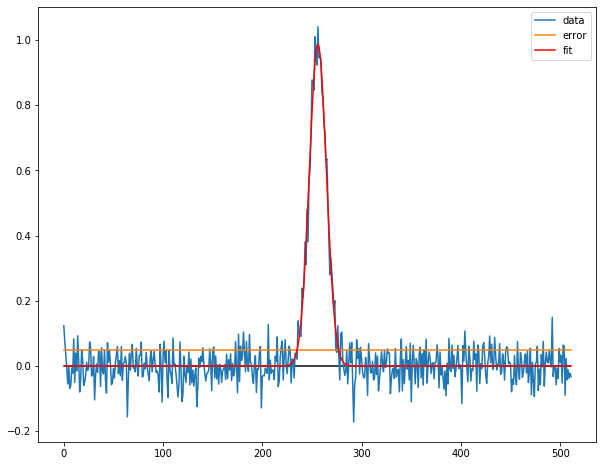

In [80]:
import matplotlib.pyplot as plt
def plotGauss(data, data_decomp, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,8))
    for i in range(len(data['x_values'])):
        ax.plot(data['x_values'][i], data['data_list'][i], label=r'data')
        ax.plot(data['x_values'][i], data['errors'][i], label=r'error')
        if data_decomp is not None:
            for a, f, m in zip(data_decomp['amplitudes_fit'][i],data_decomp['fwhms_fit'][i],data_decomp['means_fit'][i]):
                ax.plot(x, (gaussian(a, f, m))(x), color='red', label=r'fit');
    ax.hlines(0,np.min(x),np.max(x));
    ax.legend()
plotGauss(data, data_decomp, ax=None)

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

def gaussian(amp, fwhm, mean):
    return lambda x: amp * np.exp(-4. * np.log(2) * (x-mean)**2 / fwhm**2)

def unravel(list):
    return np.array([i for array in list for i in array])

FILENAME_DATA = 'simple_gaussian.p'
FILENAME_DATA_DECOMP = 'simple_gaussian_decomposed.p'

data = pickle.load(open(FILENAME_DATA, 'rb'))
spectrum = unravel(data['data_list'])
chan = unravel(data['x_values'])
errors = unravel(data['errors'])

data_decomp = pickle.load(open(FILENAME_DATA_DECOMP, 'rb'))
means_fit = unravel(data_decomp['means_fit'])
amps_fit = unravel(data_decomp['amplitudes_fit'])
fwhms_fit = unravel(data_decomp['fwhms_fit'])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

model = np.zeros(len(chan))

for j in range(len(means_fit)):
    component = gaussian(amps_fit[j], fwhms_fit[j], means_fit[j])(chan)
    model += component
    ax.plot(chan, component, color='red', lw=1.5)

ax.plot(chan, spectrum, label='Data', color='black', linewidth=1.5)
ax.plot(chan, model, label = r'$\log\alpha=1.$', color='purple', linewidth=2.)
ax.plot(chan, errors, label = 'Errors', color='green', linestyle='dashed', linewidth=2.)

ax.set_xlabel('Channels')
ax.set_ylabel('Amplitude')

ax.set_xlim(0,len(chan))
ax.set_ylim(np.min(spectrum),np.max(spectrum))
ax.legend(loc=2)

plt.show()

## Multiple Gaussians

In [84]:
# Create profile with multiple, blended Gaussians and added noise
# Store in format required for GaussPy

import numpy as np
import pickle

def gaussian(amp, fwhm, mean):
    return lambda x: amp * np.exp(-4. * np.log(2) * (x-mean)**2 / fwhm**2)

# Specify filename of output data
FILENAME = 'multiple_gaussians.p'

# Number of Gaussian functions per spectrum
NCOMPS = 3

# Component properties
AMPS = [3,2,1]
FWHMS = [20,50,40] # channels
MEANS = [220,250,300] # channels

# Data properties
RMS = 0.05
NCHANNELS = 512

# Initialize
data = {}
chan = np.arange(NCHANNELS)
errors = np.ones(NCHANNELS) * RMS

spectrum = np.random.randn(NCHANNELS) * RMS

# Create spectrum
for a, w, m in zip(AMPS, FWHMS, MEANS):
    spectrum += gaussian(a, w, m)(chan)

# Enter results into AGD dataset
data['data_list'] = data.get('data_list', []) + [spectrum]
data['x_values'] = data.get('x_values', []) + [chan]
data['errors'] = data.get('errors', []) + [errors]

pickle.dump(data, open(FILENAME, 'wb'))

In [85]:
plotGauss(data, data_decomp=None, ax=None)

using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]


SUCCESS
100 finished.%
using 6 out of 8 cpus
   ---->   0


0.00it [00:00, ?it/s]
0it [00:00, ?it/s]

SUCCESS
100 finished.%


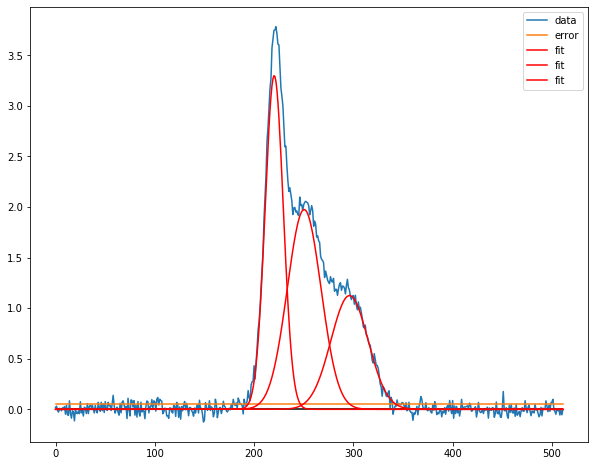

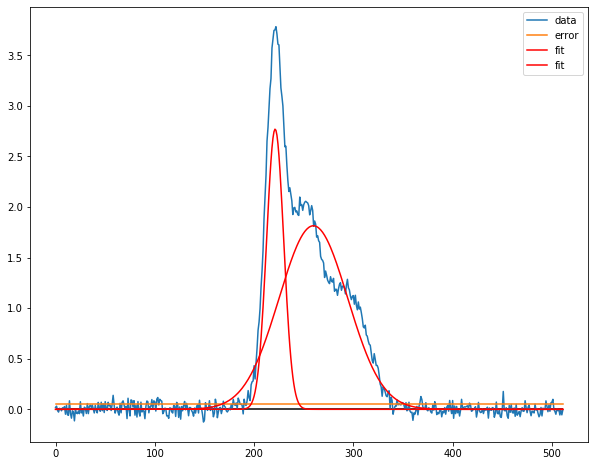

In [89]:
# Decompose multiple Gaussian dataset using AGD
import pickle
import gausspy.gp as gp

# Specify necessary parameters
ALPHA1 = [0.5, 1.5, 2.5]
for alpha1 in ALPHA1:
#     alpha1 = 0.5
    snr_thresh = 5.
    FILENAME_DATA = 'multiple_gaussians.p'
    FILENAME_DATA_DECOMP = 'multiple_gaussians_decomposed_alpha%s.p' %str(alpha1).replace('.', 'p')

    # Load GaussPy
    g = gp.GaussianDecomposer()

    # Setting AGD parameters
    g.set('phase', 'one')
    g.set('SNR_thresh', [snr_thresh, snr_thresh])
    g.set('alpha1', alpha1)

    # Run GaussPy
    data_decomp = g.batch_decomposition(FILENAME_DATA)
    plotGauss(data, data_decomp, ax=None)
    # Save decomposition information
    pickle.dump(data_decomp, open(FILENAME_DATA_DECOMP, 'wb'))

In [90]:
# Create training dataset with Gaussian profiles

import numpy as np
import pickle

# Specify the number of spectral channels (NCHANNELS)
NCHANNELS = 512

# Specify the number of spectra (NSPECTRA)
NSPECTRA = 200

# Estimate of the root-mean-square uncertainty per channel (RMS)
RMS = 0.05

# Estimate the number of components
NCOMPS = 3

# Specify the min-max range of possible properties of the Gaussian function paramters:
AMP_lims = [0.5, 4]
FWHM_lims = [20, 80] # channels
MEAN_lims = [0.25*NCHANNELS, 0.75*NCHANNELS] # channels

# Indicate whether the data created here will be used as a training set
# (a.k.a. decide to store the "true" answers or not at the end)
TRAINING_SET = True

# Specify the pickle file to store the results in
FILENAME = 'training_data.p'

In [91]:
# Create training dataset with Gaussian profiles -cont-

# Initialize
data = {}
chan = np.arange(NCHANNELS)
errors = np.ones(NCHANNELS) * RMS

# Begin populating data
for i in range(NSPECTRA):
    spectrum_i = np.random.randn(NCHANNELS) * RMS

    amps = []
    fwhms = []
    means = []

    for comp in range(NCOMPS):
        # Select random values for components within specified ranges
        a = np.random.uniform(AMP_lims[0], AMP_lims[1])
        w = np.random.uniform(FWHM_lims[0], FWHM_lims[1])
        m = np.random.uniform(MEAN_lims[0], MEAN_lims[1])

        # Add Gaussian profile with the above random parameters to the spectrum
        spectrum_i += gaussian(a, w, m)(chan)

        # Append the parameters to initialized lists for storing
        amps.append(a)
        fwhms.append(w)
        means.append(m)

    # Enter results into AGD dataset
    data['data_list'] = data.get('data_list', []) + [spectrum_i]
    data['x_values'] = data.get('x_values', []) + [chan]
    data['errors'] = data.get('errors', []) + [errors]

    # If training data, keep answers
    if TRAINING_SET:
        data['amplitudes'] = data.get('amplitudes', []) + [amps]
        data['fwhms'] = data.get('fwhms', []) + [fwhms]
        data['means'] = data.get('means', []) + [means]

# Dump synthetic data into specified filename
pickle.dump(data, open(FILENAME, 'wb'))

In [92]:
# Select the optimal value of alpha by training the AGD algorithm

import gausspy.gp as gp

# Set necessary parameters
FILENAME = 'training_data.p'
snr_thresh = 5.
alpha_initial = 1.

g = gp.GaussianDecomposer()

# Next, load the training dataset for analysis:
g.load_training_data(FILENAME)

# Set GaussPy parameters
g.set('phase', 'one')
g.set('SNR_thresh', [snr_thresh, snr_thresh])

# Train AGD starting with initial guess for alpha
g.train(alpha1_initial = alpha_initial)

Training...

1.0 0.9 -0.33992612528864197 0.0
iter 0: F1=61.5%, alpha=[1.0, nan], p=[0.00, 0.00]  (Convergence testing begins in 20 iterations)

1.3059335127597778 0.9 -0.22296846701671102 0.08158227006927407
iter 1: F1=66.5%, alpha=[1.31, nan], p=[0.08,  nan]  (Convergence testing begins in 19 iterations)

1.588187403144092 0.9 -0.133216196600345 0.07526770410248378
iter 2: F1=70.3%, alpha=[1.59, nan], p=[0.08,  nan]  (Convergence testing begins in 18 iterations)

1.7833496841868863 0.9 -0.08838073970416771 0.05204327494474518
iter 3: F1=71.7%, alpha=[1.78, nan], p=[0.05,  nan]  (Convergence testing begins in 17 iterations)

1.9149356248653826 0.9 -0.015193064062041128 0.03508958418093234
iter 4: F1=72.1%, alpha=[1.91, nan], p=[0.04,  nan]  (Convergence testing begins in 16 iterations)

1.963698966702152 0.9 0.0052174802716006274 0.01300355782313852
iter 5: F1=72.3%, alpha=[1.96, nan], p=[0.01,  nan]  (Convergence testing begins in 15 iterations)

1.97200679228085 0.9 0.00521748027160

/home/kristian/Analysis/gausspy/gausspy/gradient_descent.py:429: RuntimeWarning: invalid value encountered in less
  converge_logic = gd.fracdiff_alpha1 < thresh



1.9403455944249068 0.9 -0.0001482891144113374 4.852849762565133e-05
iter 22: F1=72.3%, alpha=[1.94, nan], p=[0.00,  nan]   (0.04, NAN < 0.03 for 0 iters [10 required])

1.9405275831255027 0.9 -0.0001482891144113374 4.853032015888677e-05
iter 23: F1=72.3%, alpha=[1.94, nan], p=[0.00,  nan]   (0.00, NAN < 0.03 for 1 iters [10 required])

1.9407095736486317 0.9 -0.0001482891144113374 4.853080616774955e-05
iter 24: F1=72.3%, alpha=[1.94, nan], p=[0.00,  nan]   (0.01, NAN < 0.03 for 2 iters [10 required])

1.9408915646577696 0.9 0.0036011602502412643 4.853093577009323e-05
iter 25: F1=72.3%, alpha=[1.94, nan], p=[0.00,  nan]   (0.01, NAN < 0.03 for 3 iters [10 required])

1.9376990513683225 0.9 -0.0001482891144113374 -0.0008513368771858746
iter 26: F1=72.3%, alpha=[1.94, nan], p=[-0.00,  nan]   (0.01, NAN < 0.03 for 4 iters [10 required])

1.9369811746941068 0.9 -0.0001482891144113374 -0.0001914337797908653
iter 27: F1=72.3%, alpha=[1.94, nan], p=[-0.00,  nan]   (0.01, NAN < 0.03 for 5 iter